In [ ]:
import matplotlib.pyplot as plt 
import torch

Distributional Semantics vs Denotational Semantics 

"You shall know a word by the company it keeps" (J.R. Firth 1957)

The words meaning is defined by the words in its context. 

Wittgenstein's use theory of meaning. 

Word: token is one string "banking"; type - use and meaning banking has across instances

word vectors / word embeddings / neural word representations 
embeddings because it's a vector space

$likelihood = L(θ) = \prod_\limits{t=1}^{T}\prod\limits_{\substack{-m\leq j \leq m \\ j \neq 0}}P(w_{t+j}\mid 
w_t;θ)$

In [ ]:
corpus = ["hello", "world", "this", "is", "a", "signal", "from", "outer", "space"]
T=len(corpus)
T

9

In [ ]:
m = 2
for t in range(T):

  window = [] 
  for j in range(-m, m+1):
    if j == 0: 
      continue
    if t + j < 0 or t + j >= len(corpus):
      continue 
    window.append(corpus[t+j])
  print(corpus[t] + ": " +" ".join(window))


hello: world this
world: hello this is
this: hello world is a
is: world this a signal
a: this is signal from
signal: is a from outer
from: a signal outer space
outer: signal from space
space: from outer


Average Negative Log Likelihood

$Loss Function = -\frac{1}{T} \log L(\theta) =-\frac{1}{T} \sum \limits_{t=1}^{T}\sum\limits_{\substack{-c\leq j \leq c \\ j \neq 0}}\log P(w_{t+j}\mid 
w_t;θ)$

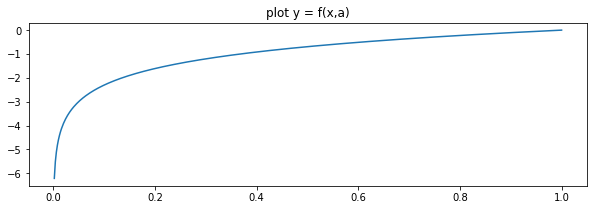

In [ ]:
ps = torch.linspace(0, 1, 500)
y = torch.log(ps)
fig, ax = plt.subplots(1,1
                       , figsize=(10,3))
ax.set_title("plot y = f(x,a)")
ax.plot(ps,y)


log at $0$ is $-∞$

log at $1$ is $0$

Assume a word is in the context window but the probability is currently at 0. 

Then the log prob is $-∞$ and the loss function will be $- - ∞ = + ∞$. 

Therefore, any optimization algorithm would increase the probability of a context word until the probability is getting closer to 1. 

### How do we calculate the $P(w_{t+j}\mid 
w_t;θ)$? 


$v_w$ vector for word $w$ if it is in the center. 

$u_w$ vector for word $w$ if it is in the context window. 


$softmax = P(w_{O} \mid w_{I}) = \frac{\exp (u_{o}^{T} v_{i}) }{∑\limits_{w=1}^W \exp(u_w^Tv_{i})} $

Let's assume a dimension of 5 per word vector. 

In [ ]:
unique_corpus = list(set(corpus))
W = len(unique_corpus)
W

9

In [ ]:
torch.rand(5)

tensor([0.8125, 0.9213, 0.2213, 0.3201, 0.8874])

In [ ]:
v = [torch.rand(5) for _ in range(W)]
u = [torch.rand(5) for _ in range(W)] 

In [ ]:
v

[tensor([0.9836, 0.1184, 0.0610, 0.8791, 0.0413]),
 tensor([0.3349, 0.3526, 0.9834, 0.9293, 0.0624]),
 tensor([0.3432, 0.3523, 0.3662, 0.1719, 0.5509]),
 tensor([0.8753, 0.0727, 0.3163, 0.9933, 0.2437]),
 tensor([0.0378, 0.2999, 0.1218, 0.3631, 0.7286]),
 tensor([0.6073, 0.4191, 0.9365, 0.9983, 0.6297]),
 tensor([0.2665, 0.4492, 0.3298, 0.4209, 0.7204]),
 tensor([0.0554, 0.1262, 0.9130, 0.8364, 0.7958]),
 tensor([0.0310, 0.6926, 0.6026, 0.2033, 0.5801])]

In [ ]:
center = 7
context = 8
corpus[7], corpus[8]

('outer', 'space')

In [ ]:
factor = numerator = torch.exp(torch.dot(u[context], v[center]))
factor

tensor(5.3496)

In [ ]:
normalization_constant = 0
for w in range(W): 
  normalization_constant += torch.dot(u[w], v[center])
normalization_constant

tensor(11.7670)

In [ ]:
p = factor / normalization_constant
p

tensor(0.4546)

In [ ]:
def prob(center, context): 
  factor = torch.exp(torch.dot(u[context], v[center]))
  normalization_constant = 0
  for w in range(W): 
    normalization_constant += torch.dot(u[w], v[center])
  return factor / normalization_constant

In [ ]:
prob(7,8)

tensor(0.4546)

In [ ]:
prob(8,7)

tensor(0.3007)

In [ ]:
corpus[8], corpus[7]

('space', 'outer')

## From randomness to order: how do we update word vectors? 

### The Math

$\frac{\partial}{\partial v_i} \log P(w_o \mid w_i) =\frac{\partial}{\partial v_i} \log \frac{\exp (u_o^Tv_{i})}{\sum \limits_{w=1}^W \exp (u_w^T v_i)}$


$=\frac{\partial}{\partial v_i} \log \exp (u_o^T v_i) - \frac{\partial}{\partial v_i} \log \sum \limits_{w=1}^W \exp (u_w^T v_i) $ 

$=u_o - \frac{\partial}{\partial v_i}  \log  \sum  \limits_{w=1}^W \exp (u_w^T  v_i) $ 

$=u_o- \frac{1}{\sum \limits_{w=1}^W \exp (u_w^T v_i)} \sum \limits_{k=1}^W \exp (u_k^T v_i) \frac{\partial}{\partial v_i}(u_k^T v_i) $ 

$=u_o - \frac{1}{\sum \limits_{w=1}^W \exp (u_w^T v_i)} \sum \limits_{k=1}^W  \exp (u_k^T v_i) u_k $ 

$=u_o -\sum \limits_{k=1}^W \frac{\exp (u_k^T v_i)}{\sum \limits_{w=1}^W \exp (u_w^T v_i)}   u_k $ 

$=u_o -\sum \limits_{k=1}^W P(u_k \mid v_i )   u_k $ 

Similarly for ... 



$\frac{\partial}{\partial u_o} \log P(w_o \mid w_i) =\frac{\partial}{\partial u_o} \log \frac{\exp (u_o^Tv_{i})}{\sum \limits_{w=1}^W \exp (u_w^T v_i)}$


$=\frac{\partial}{\partial u_o} \log \exp (u_o^T v_i) - \frac{\partial}{\partial u_o} \log \sum \limits_{w=1}^W \exp (u_w^T v_i) $ 

$=v_i^T - \frac{\partial}{\partial u_o}  \log  \sum  \limits_{w=1}^W \exp (u_w^T  v_i) $ 

$=v_i^T- \frac{1}{\sum \limits_{w=1}^W \exp (u_w^T v_i)} \sum \limits_{k=1}^W \exp (u_k^T v_i) \frac{\partial}{\partial u_o}(u_k^T v_i) $ 

$u_k^T v_i$ is $0$ unless $k=o$

$=v_i^T - \frac{1}{\sum \limits_{w=1}^W \exp (u_w^T v_i)}  \exp (u_o^T v_i) v_i^T $ 

$=v_i^T -\frac{\exp (u_o^T v_i)}{\sum \limits_{w=1}^W \exp (u_w^T v_i)}   v_i^T $ 

$=v_i^T - P(u_o \mid v_i )   v_i^T $ 

In [ ]:
 @ torch.arange(3).float().reshape(3,1).T 

tensor([[0., 1., 2.],
        [0., 1., 2.],
        [0., 1., 2.]])

In [ ]:
torch.arange(3).float().reshape(3,1)

tensor([[0.],
        [1.],
        [2.]])

In [ ]:
## 


## Negative Sampling

In [ ]:
import string
import nltk 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(corpus): 
  return [token for token in word_tokenize(corpus) if token not in string.punctuation]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenize("New York is awesome!")

['New', 'York', 'is', 'awesome']

In [ ]:
from urllib.request import urlopen
hamlet = urlopen('https://www.gutenberg.org/cache/epub/1524/pg1524.txt').read().decode('utf-8-sig')

In [ ]:
tokens = tokenize(hamlet)

In [ ]:
from collections import Counter 
words_count = Counter(tokens)
vocab = [word for word, _ in words_count.most_common(400_000)]
len(vocab)

5860

Sampling Probability: $P(w) = \frac{Count(w)^{\frac{3}{4}}}{Z}$

In [ ]:
from torch.distributions.multinomial import Multinomial
counts = torch.Tensor([count ** (3/4) for _, count in words_count.most_common(400_000)])
for word, count in zip(vocab, Multinomial(10, probs=counts).sample()): 
  if count <= 0: 
    continue
  print(word, int(count))

HAMLET 1
our 1
ROSENCRANTZ 1
Let 1
look 1
almost 1
b 1
honoured 1
indifferently 1
index 1


In [ ]:
def get_negative_samples(k):
  negs = []
  # Multinomial automatically normalizes probabilities => Z unnecessary 
  for word, count in zip(vocab, Multinomial(k, probs=counts).sample()): 
    if count <= 0: 
      continue
    for _ in range(int(count)):
      negs.append(word)
  return negs

In [ ]:
get_negative_samples(5)

['of', 'A', 'hall', 'sets', 'quarter']

## Run Word2Vec

In [ ]:
# hyperparameters 
k = 10 
